In [1]:
dat <- read.csv("/home/data1/Asthma/data/GSE201955_RNAseq_118_processeddata.txt",sep="\t",header = F)

In [3]:
dat[dat[,1]=="CD36",]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5405,CD36,3.99412264528843,1.91126468038698,3.64503548242527,3.93700121017114,3.13169193410372,1.91489311577496,1.14570823049301,4.8782627657364,2.24782045023767,⋯,2.87088276307563,1.54657357919783,5.57336940060427,3.22905219425259,1.93300255209701,2.33423572759086,3.28299119949195,1.11857443767104,4.13782365505131,3.01278836293654


In [4]:
dat<-dat[c(1,5405),-1]

In [5]:
dat

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,asthma: Asthma,asthma: Control,asthma: Asthma,asthma: Control,asthma: Asthma,asthma: Asthma,asthma: Asthma,asthma: Asthma,asthma: Asthma,asthma: Asthma,⋯,asthma: Control,asthma: Control,asthma: Control,asthma: Asthma,asthma: Control,asthma: Asthma,asthma: Asthma,asthma: Asthma,asthma: Asthma,asthma: Asthma
5405,3.99412264528843,1.91126468038698,3.64503548242527,3.93700121017114,3.13169193410372,1.91489311577496,1.14570823049301,4.8782627657364,2.24782045023767,2.26700790754198,⋯,2.87088276307563,1.54657357919783,5.57336940060427,3.22905219425259,1.93300255209701,2.33423572759086,3.28299119949195,1.11857443767104,4.13782365505131,3.01278836293654


In [6]:
Asthma<-as.numeric(dat[2,dat[1,]=="asthma: Asthma"])
Control<-as.numeric(dat[2,dat[1,]=="asthma: Control"])

In [7]:
length(Asthma)
length(Control)

[1] 79

[1] 39

In [8]:
t.test(Asthma,Control)


	Welch Two Sample t-test

data:  Asthma and Control
t = 1.893, df = 80.165, p-value = 0.06197
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0242708  0.9716140
sample estimates:
mean of x mean of y 
 2.979507  2.505835 


In [9]:
c(rep("Asthma",79),rep("Control",39))->Group

In [10]:
c(Asthma,Control)->Expression

In [11]:
dat=data.frame(Group=Group,Expression=Expression)

In [12]:
library(ggplot2)

dat$Group <- factor(dat$Group, levels = c("Asthma","Control"))

In [13]:
library(rstatix)
library(ggpubr)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [14]:
p3.vol<- ggplot(dat,aes(x = Group, y = Expression, fill = Group)) + geom_violin(alpha=0.4,width=0.7 ,position=position_dodge(0.7)) + geom_boxplot(alpha=0.8, width=0.1, position=position_dodge(0.7)) + scale_y_continuous(name = "Expression levels of CD36") + scale_x_discrete(name = "") + theme_bw() + theme(text = element_text(size = 12),axis.text.x=element_text(size = 11),legend.position = "none") + scale_fill_brewer(palette = "Accent") 

In [16]:
my_comparisons <- list( c("Asthma", "Control") )

In [ ]:
pdf("/home/data1/Asthma/data/CD36_GSE201955_RNAseq.pdf", width = 10, height = 8)
p3.vol + stat_compare_means(comparisons = my_comparisons,  method="t.test") 
dev.off()

png 
  2

In [22]:
pdf("/home/data1/Asthma/data/CD36_GSE201955_RNAseq_wilcox.test.0421.pdf", width = 10, height = 8)
p3.vol<- ggplot(dat,aes(x = Group, y = Expression, fill = Group)) + geom_violin(alpha=0.4,width=0.7 ,position=position_dodge(0.7)) + geom_boxplot(alpha=0.8, width=0.1, position=position_dodge(0.7)) + scale_y_continuous(name = "Expression levels of CD36") + scale_x_discrete(name = "") + theme_bw() + theme(text = element_text(size = 12),axis.text.x=element_text(size = 11),legend.position = "none") + scale_fill_brewer(palette = "Accent") 
p3.vol + stat_compare_means(comparisons = my_comparisons,  method="wilcox.test") +
  geom_dotplot(
    aes(fill = Group, color = Expression), trim = FALSE,
    binaxis='y', stackdir='center', dotsize = 0.5,
    position = position_dodge(0.8)
  )
dev.off()

Warning message in geom_dotplot(aes(fill = Group, color = Expression), trim = FALSE, :
“Ignoring unknown parameters: `trim`”
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


pdf 
  2

Warning message in geom_dotplot(aes(fill = Group, color = Expression), trim = FALSE, :
“Ignoring unknown parameters: `trim`”
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


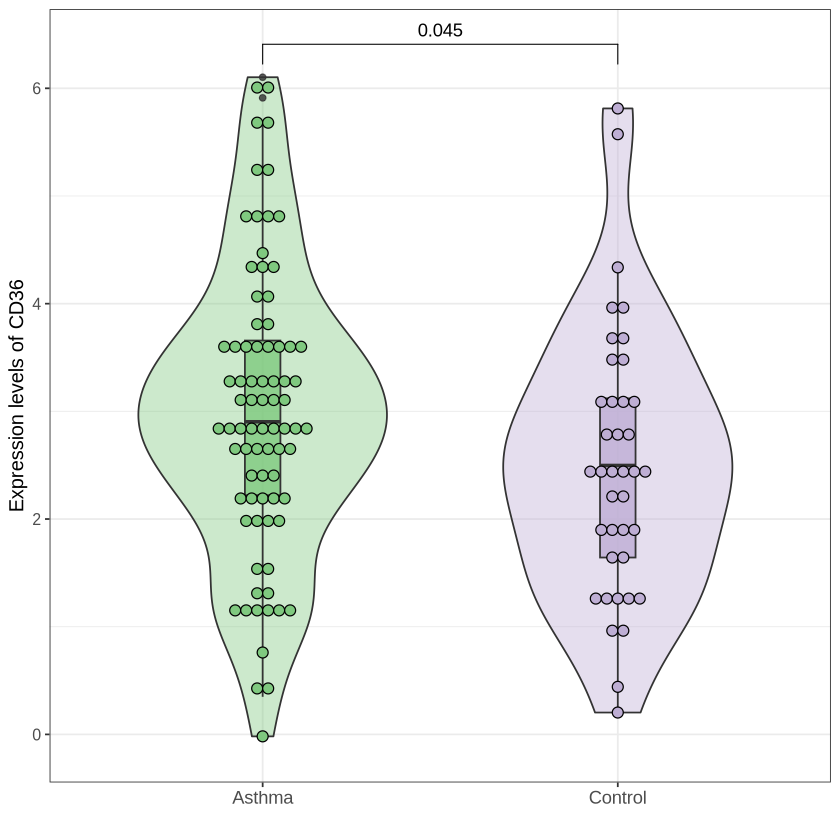

In [21]:
p3.vol<- ggplot(dat,aes(x = Group, y = Expression, fill = Group)) + geom_violin(alpha=0.4,width=0.7 ,position=position_dodge(0.7)) + geom_boxplot(alpha=0.8, width=0.1, position=position_dodge(0.7)) + scale_y_continuous(name = "Expression levels of CD36") + scale_x_discrete(name = "") + theme_bw() + theme(text = element_text(size = 12),axis.text.x=element_text(size = 11),legend.position = "none") + scale_fill_brewer(palette = "Accent") 
p3.vol + stat_compare_means(comparisons = my_comparisons,  method="wilcox.test") +
  geom_dotplot(
    aes(fill = Group, color = Expression), trim = FALSE,
    binaxis='y', stackdir='center', dotsize = 0.5,
    position = position_dodge(0.8)
  )

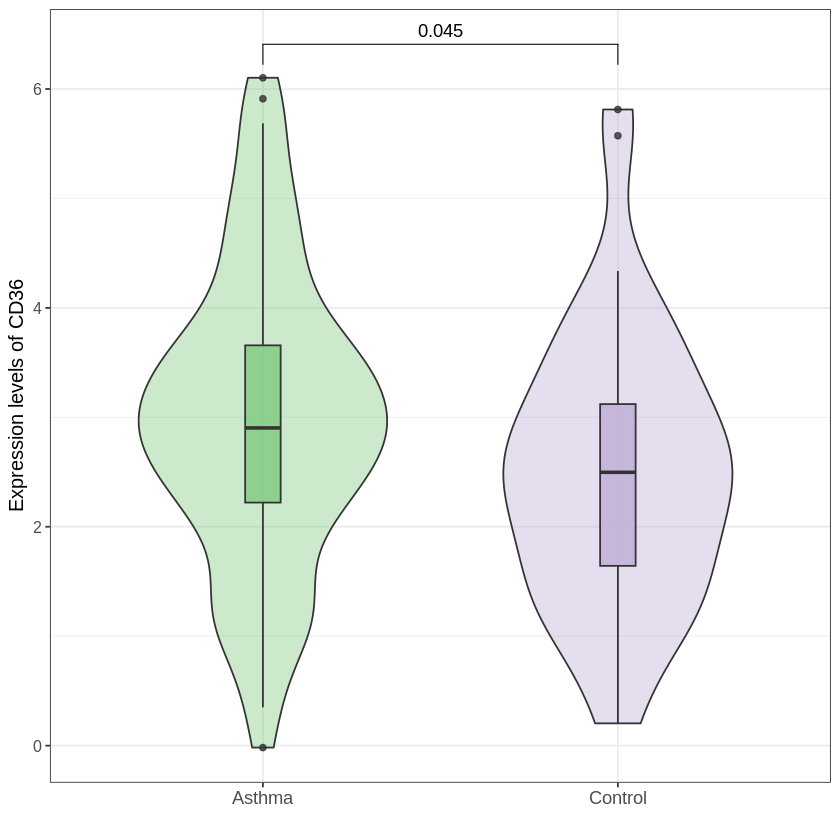

In [25]:
p3.vol + stat_compare_means(comparisons = my_comparisons,  method="wilcox.test") 

In [22]:
wilcox.test(Asthma,Control)


	Wilcoxon rank sum test with continuity correction

data:  Asthma and Control
W = 1891, p-value = 0.04525
alternative hypothesis: true location shift is not equal to 0
